<a href="https://colab.research.google.com/github/sankeerthana439/TDD/blob/master/Task2_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Convert to grayscale
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])
x_test_gray = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])


In [ ]:
# Normalize the data
scaler = StandardScaler()
x_train_gray = scaler.fit_transform(x_train_gray.reshape(-1, 32*32))
x_test_gray = scaler.transform(x_test_gray.reshape(-1, 32*32))

In [ ]:
# Split the data into training and test sets (70% training, 30% test)
split_index = int(0.7 * len(x_train_gray))
x_train_split = x_train_gray[:split_index]
x_test_split = x_train_gray[split_index:]

In [ ]:
# Define the autoencoder model
input_img = Input(shape=(1024,))
encoded = Dense(128, activation='linear')(input_img)
decoded = Dense(1024, activation='linear')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train_split, x_train_split,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_split, x_test_split))

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5577 - val_loss: 0.1741
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1555 - val_loss: 0.1163
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.1093 - val_loss: 0.0934
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0899 - val_loss: 0.0818
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0796 - val_loss: 0.0753
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0744 - val_loss: 0.0718
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0712 - val_loss: 0.0699
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 9/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0684 - val_loss: 0.0682
Epoch 10/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 11/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0675 - val_loss: 0.0674
Epoch 12/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Extract the encoder part of the autoencoder
encoder = Model(input_img, encoded)

In [ ]:
# Get the encoded representations of the test set
encoded_imgs = encoder.predict(x_test_split)


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


In [ ]:
# Perform PCA on the original data
pca = PCA(n_components=128)
pca.fit(x_test_split)
pca_components = pca.components_

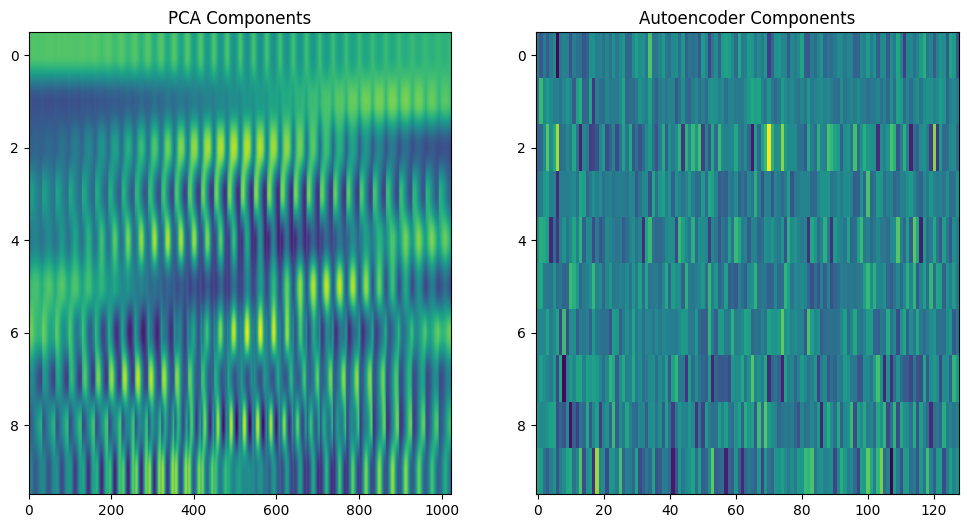

In [ ]:
# Compare the eigenvectors obtained using PCA and autoencoders
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(pca_components[:10], aspect='auto')
plt.title('PCA Components')

plt.subplot(1, 2, 2)
plt.imshow(encoded_imgs[:10], aspect='auto')
plt.title('Autoencoder Components')

plt.show()


In [ ]:
print("Comparison of eigenvectors obtained using PCA and autoencoders:")
print("PCA Components shape:", pca_components.shape)
print("Autoencoder Components shape:", encoded_imgs.shape)

Comparison of eigenvectors obtained using PCA and autoencoders:
PCA Components shape: (128, 1024)
Autoencoder Components shape: (15000, 128)


In [ ]:
#Observations:
#PCA Components:

#PCA finds the principal components that maximize the variance in the data.
#The eigenvectors represent directions in the data space that capture the most variance.
#Autoencoder Components:

#The autoencoder learns a compressed representation of the data.
#he components (encoded representations) are learned features that aim to reconstruct the input data.
#Comparison:

#PCA components are orthogonal and capture global variance.
#Autoencoder components may capture more complex, non-linear relationships in the data.
#The comparison will show how well the autoencoder captures the variance compared to PCA.